# Python Datenvisualisierung 2
## Plotly 1
***
In diesem Notebook wird behandelt:
- Einführung in Plotly
- Liniendiagramme
- Streudiagramme
- Balkendiagramme
- Kreisdiagramme
***

## Einführung in die Datenvisualisierung mit Plotly

### Was ist Plotly?

#### Überblick über Plotly und Plotly Express

**Plotly** ist eine Open-Source-Bibliothek für interaktive Datenvisualisierung, die in mehreren Programmiersprachen verfügbar ist, einschließlich Python, R, JavaScript und Julia. In dieser Schulung konzentrieren wir uns auf die Python-Implementierung.

Plotly wurde 2013 entwickelt und basiert auf der JavaScript-Bibliothek D3.js und der Webvisualisierungsbibliothek WebGL. Dies ermöglicht es Plotly, leistungsstarke, interaktive Visualisierungen zu erstellen, die nativ in Webbrowsern laufen.

In der Python-Umgebung bietet Plotly zwei hauptsächliche Programmierschnittstellen (APIs):

1. **Plotly Graph Objects**: Diese API bietet maximale Anpassungsmöglichkeiten, erfordert jedoch mehr Code und ist für Anfänger komplexer.

2. **Plotly Express**: Diese vereinfachte API wurde 2019 eingeführt und ist viel benutzerfreundlicher. Sie ermöglicht die Erstellung komplexer Visualisierungen mit nur wenigen Codezeilen.

**Plotly Express** (häufig als `px` importiert) ist der empfohlene Einstiegspunkt für die meisten Nutzer und wird der Hauptfokus unseres Seminars sein. Diese hochrangige API bietet eine einfache, konsistente Syntax für die Erstellung einer Vielzahl von Diagrammtypen, während sie gleichzeitig leistungsstarke Anpassungsoptionen beibehält.


#### Vergleich mit Matplotlib

Matplotlib ist seit langem die Standard-Bibliothek für Datenvisualisierung in Python, aber Plotly bietet einige bedeutende Unterschiede und Vorteile:

| Aspekt | Matplotlib | Plotly |
|--------|------------|--------|
| **Interaktivität** | Primär statisch; begrenzte Interaktivität möglich | Von Grund auf interaktiv; Zoomen, Schwenken, Hover-Informationen |
| **Ausgabeformat** | Primär für statische Bilder (PNG, PDF) optimiert | Erzeugt interaktive HTML/JavaScript-Visualisierungen |
| **Syntax** | Prozedurale, zustandsbasierte API (MATLAB-ähnlich) | Deklarative, objektorientierte API |
| **Dashboards** | Erfordert zusätzliche Bibliotheken (z.B., Streamlit) | Nahtlose Integration mit Dash für Webanwendungen |
| **3D-Visualisierung** | Begrenzte 3D-Unterstützung über mplot3d | Umfassende native 3D-Unterstützung mit interaktiver Rotation |
| **Performance** | Schneller für einfache statische Grafiken | Kann bei sehr großen Datensätzen ressourcenintensiver sein |
| **Lernkurve** | Steiler, aber umfangreich dokumentiert | Intuitiver für Anfänger, besonders mit Plotly Express |
| **Integration** | Tiefe Integration mit NumPy/SciPy/Pandas | Bessere Integration mit Webframeworks |

**Wann sollte man Matplotlib verwenden?**
- Für wissenschaftliche Publikationen, die statische, hochqualitative Grafiken erfordern
- Wenn Speichereffizienz und Geschwindigkeit kritisch sind
- Bei vollständiger Kontrolle über jeden Aspekt des Layouts
- Für bestehende Codebasis, die bereits auf Matplotlib basiert

**Wann sollte man Plotly verwenden?**
- Für interaktive Dashboards und Web-Anwendungen
- Wenn Endbenutzer mit den Daten interagieren sollen
- Für komplexe Visualisierungen, die von Zoom- und Hover-Funktionen profitieren
- Wenn Sie komplexe 3D-Visualisierungen erstellen möchten
- Für Präsentationen, bei denen die Erkundung von Daten von Vorteil ist

## 1 Grundlegende Architektur von Plotly

Plotly verwendet ein hierarchisches, objektorientiertes System zum Erstellen von Visualisierungen. Die Hauptkomponenten sind:

1. **Figure**: Das Hauptobjekt, das die gesamte Visualisierung darstellt. Eine Figure enthält alle Daten, Layouts und Konfigurationsinformationen.

2. **Traces**: Einzelne Datenreihen oder Visualisierungselemente innerhalb einer Figure. Beispiele für Traces sind:
   - Scatter (für Streudiagramme und Liniendiagramme)
   - Bar (für Balkendiagramme)
   - Histogram
   - Box (für Box-Plots)
   - Heatmap
   - Pie (für Kreisdiagramme)
   
   Jeder Trace hat seinen eigenen Typ und spezifische Eigenschaften.

3. **Layout**: Steuert das Erscheinungsbild der Visualisierung, einschließlich:
   - Titel
   - Achsen (Beschriftungen, Bereiche, Tickmarks)
   - Legenden
   - Anmerkungen
   - Farben und Themes
   - Größe und Ränder

4. **Frames**: (Optional) Für Animationen verwendet, wobei jeder Frame einen Zustand der Visualisierung darstellt.

5. **Config**: (Optional) Steuert das Verhalten der Benutzeroberfläche, wie z.B. die angezeigten Buttons in der Modusleiste.

Diese Komponenten werden in einem JSON-ähnlichen Format gespeichert, was die Speicherung, Übertragung und Wiederverwendung von Plotly-Visualisierungen erleichtert.

**Einfaches Beispiel der Architekturen:**

Bei Verwendung von **Plotly Express** wird diese Architektur für Sie verwaltet:

```python
import plotly.express as px
import pandas as pd
import numpy as np

# Erstellen einfacher Daten
x = np.linspace(0, 10, 100)
y = np.sin(x)
df = pd.DataFrame({'x': x, 'y': y})

# Einfaches Liniendiagramm erstellen
fig = px.line(df, x='x', y='y', title='Einfache Sinuswelle')
fig.show()
```

Bei Verwendung von **Plotly Graph Objects** ist die Architektur expliziter:

```python
import plotly.graph_objects as go

# Erstellen einfacher Daten
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Figure erstellen und Trace hinzufügen
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='lines', name='Sinus')
)

# Layout anpassen
fig.update_layout(
    title='Einfache Sinuswelle',
    xaxis_title='X-Achse',
    yaxis_title='Y-Achse'
)

fig.show()
```

Beide Methoden erzeugen eine ähnliche Visualisierung, aber die Graph Objects-API bietet mehr explizite Kontrolle auf Kosten von mehr Code.

**Ein Beispiel:**

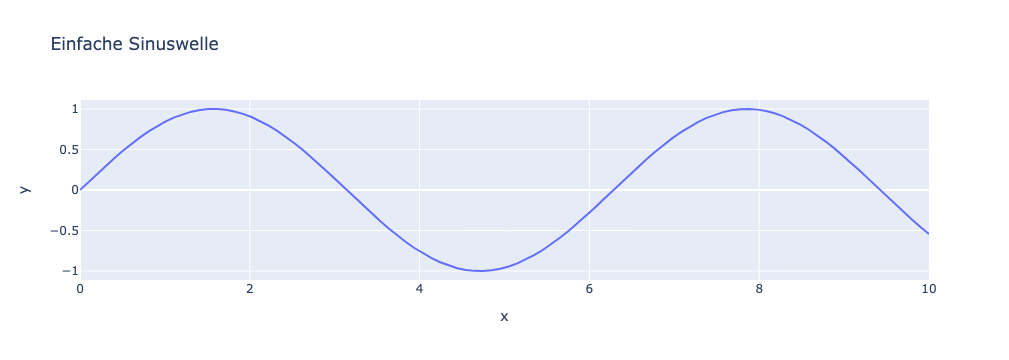

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

# Einfache Daten erstellen
x = np.linspace(0, 10, 100)  # 100 Punkte von 0 bis 10
y = np.sin(x)                # Sinusfunktion dieser Punkte
df = pd.DataFrame({'x': x, 'y': y})  # In DataFrame umwandeln

# Einfaches Liniendiagramm erstellen
fig = px.line(df, x='x', y='y', title='Einfache Sinuswelle')

# Zeige die Figur an
fig.show()

**Erklärung des Codes:**

1. Wir importieren die notwendigen Bibliotheken:
   - `plotly.express` als `px`: Die hochrangige API von Plotly
   - `pandas` für das Datenmanagement
   - `numpy` für numerische Operationen

2. Wir erstellen einfache Daten:
   - Ein Array `x` mit 100 gleichmäßig verteilten Punkten von 0 bis 10
   - Ein Array `y` als Sinus von `x`
   - Diese werden in einem pandas DataFrame zusammengefasst, was die Arbeit mit Plotly Express erleichtert

3. Wir erstellen eine Visualisierung mit `px.line()`:
   - Der erste Parameter ist unser DataFrame
   - `x='x'` und `y='y'` geben an, welche Spalten für die x- und y-Achsen verwendet werden sollen
   - `title='Einfache Sinuswelle'` setzt den Titel des Diagramms

4. Wir zeigen die Figur mit `fig.show()` an

**Was passiert im Hintergrund:**

Plotly erzeugt eine interaktive Visualisierung. Diese Visualisierung ist tatsächlich ein eingebettetes HTML/JavaScript-Element, das auf dem Plotly.js-Framework basiert.

Die Visualisierung bietet automatisch mehrere interaktive Funktionen:
- Zoomen durch Klicken und Ziehen
- Schwenken durch Klicken und Ziehen in gezoomtem Zustand
- Hover-Informationen, die die genauen x- und y-Werte anzeigen
- Eine Werkzeugleiste oben rechts mit verschiedenen Optionen wie:
  - Zoom zurücksetzen
  - Herunterladen als PNG
  - Umschalten zwischen verschiedenen Interaktionsmodi

Dies ist ein grundlegendes Beispiel, aber die gleiche allgemeine Struktur wird für komplexere Visualisierungen verwendet.

### Matplotlib im Vergleich:

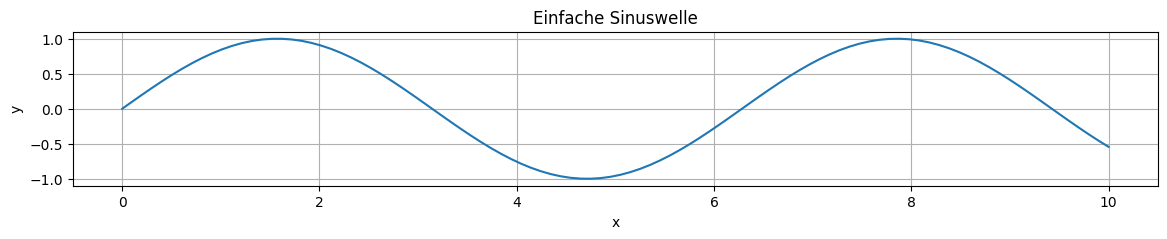

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Einfache Daten erstellen
x = np.linspace(0, 10, 100)  # 100 Punkte von 0 bis 10
y = np.sin(x)                # Sinusfunktion dieser Punkte

# Einfaches Liniendiagramm erstellen
plt.figure(figsize=(14, 2))
plt.plot(x, y)
plt.title('Einfache Sinuswelle')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## 2 Liniendiagramme (Line Plots)

### Wie funktionieren Liniendiagramme in Plotly Express?

Die Hauptfunktion für Liniendiagramme in Plotly Express ist `px.line()`. Diese Funktion verbindet Datenpunkte mit Linien und kann sowohl mit Pandas-DataFrames als auch mit einfachen Listen oder Arrays verwendet werden.

**Wichtige Parameter:**

- `data_frame`: Der DataFrame, der die zu plottenden Daten enthält
- `x`: Die Spalte für die x-Achse
- `y`: Die Spalte(n) für die y-Achse. Kann ein einzelner Spaltenname oder eine Liste von Spaltennamen sein
- `color`: (Optional) Spalte zur Farbkodierung der Linien
- `line_dash`: (Optional) Spalte zur Bestimmung des Linienstils (durchgezogen, gestrichelt, etc.)
- `markers`: (Optional) Boolean, um Marker an den Datenpunkten anzuzeigen
- `title`: (Optional) Titel des Diagramms
- `labels`: (Optional) Dictionary, um Achsenbeschriftungen anzupassen
- `template`: (Optional) Vordefiniertes Design-Template
- `line_shape`: Form der Verbindungslinien ('linear', 'spline', 'hv', 'vh', 'hvh', 'vhv')

### Beispiel 1: Einfaches Liniendiagramm

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Einfache Daten erstellen
x = np.linspace(0, 10, 100)
y = np.sin(x)
df = pd.DataFrame({'x': x, 'y': y})

# Liniendiagramm erstellen
fig = px.line(df, x='x', y='y', title='Sinuswellenfunktion')

# Diagramm anzeigen
fig.show()

**Erklärung:**
- Wir erstellen einen DataFrame mit x-Werten von 0 bis 10 und entsprechenden Sinuswerten
- Mit `px.line()` erzeugen wir ein einfaches Liniendiagramm
- Die resultierende Visualisierung zeigt eine Sinuswelle

### Beispiel 2: Mehrere Linien in einem Diagramm

In [ ]:
# Mehrere Funktionen in einem Diagramm
x = np.linspace(0, 2*np.pi, 100)
df = pd.DataFrame({
    'x': x,
    'Sinus': np.sin(x),
    'Kosinus': np.cos(x),
    'Sinus(2x)': np.sin(2*x)
})

# Mehrere Linien in einem Diagramm
fig = px.line(
    df, x='x', 
    y=['Sinus', 'Kosinus', 'Sinus(2x)'], 
    title='Trigonometrische Funktionen',
    labels={'x': 'X-Werte (Radian)', 'value': 'Y-Werte'},
    line_dash_sequence=['solid', 'dash', 'dot']  # Linienstile
)

# Layout anpassen
fig.update_layout(
    legend_title_text='Funktion',
    xaxis_title='X-Werte (Radian)',
    yaxis_title='Y-Werte'
)

fig.show()

**Erklärung:**
- Wir erstellen einen DataFrame mit mehreren Y-Spalten für verschiedene trigonometrische Funktionen
- Wir übergeben eine Liste von Spaltennamen an den `y`-Parameter
- Wir verwenden `line_dash_sequence`, um verschiedene Linienstile zuzuweisen
- Wir passen das Layout mit `update_layout()` an

### Beispiel 3: Anpassen der Linienform

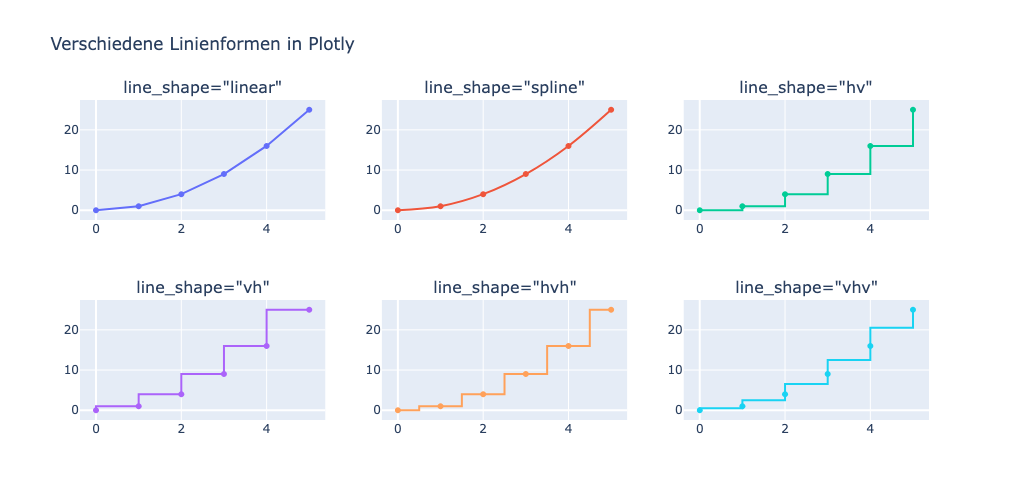

In [5]:
# Daten für Demonstration verschiedener Linienformen
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]
df = pd.DataFrame({'x': x, 'y': y})

# Subplot-Funktion verwenden, um verschiedene Linienformen zu vergleichen
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Verschiedene Linienformen
line_shapes = ['linear', 'spline', 'hv', 'vh', 'hvh', 'vhv']

# 2x3 Subplots erstellen
fig = make_subplots(
    rows=2, cols=3, 
    subplot_titles=[f'line_shape="{shape}"' for shape in line_shapes]
)

# Für jede Linienform einen Subplot erstellen
for i, shape in enumerate(line_shapes):
    row = i // 3 + 1
    col = i % 3 + 1
    
    fig.add_trace(
        go.Scatter(
            x=df['x'], 
            y=df['y'], 
            mode='lines+markers', 
            line=dict(shape=shape)
        ),
        row=row, col=col
    )

# Layout anpassen
fig.update_layout(
    height=500, 
    width=900, 
    title_text="Verschiedene Linienformen in Plotly",
    showlegend=False
)

fig.show()

**Erklärung:**
- Wir demonstrieren die verschiedenen Linienformen, die mit dem Parameter `line_shape` möglich sind
- Dafür verwenden wir eine Kombination aus Plotly Express und der niedrigeren Graph Objects-API
- Die Formen umfassen:
  - `linear`: Gerade Linien von Punkt zu Punkt
  - `spline`: Glatte Kurven
  - `hv`: Horizontal dann vertikal
  - `vh`: Vertikal dann horizontal
  - `hvh`: Horizontal-vertikal-horizontal
  - `vhv`: Vertikal-horizontal-vertikal

#### 2.1 Aufgaben: 

> (a) Erstelle ein Liniendiagramm für die  Funktion: f(x) = x² - 2x + 3 für x von -5 bis 5 (mit 100 Punkten)
> - Füge einen aussagekräftigen Titel und Achsenbeschriftungen hinzu

In [ ]:
# Deine Lösung:





#### Lösung:

In [ ]:
# Daten generieren
x = np.linspace(-5, 5, 100)
y = x**2 - 2*x + 3

# DataFrame erstellen
df = pd.DataFrame({'x': x, 'y': y})

# Liniendiagramm erstellen
fig = px.line(
    df, 
    x='x', 
    y='y', 
    title='Quadratische Funktion: f(x) = x² - 2x + 3',
    labels={'x': 'x-Werte', 'y': 'f(x)'}
)

# Layout anpassen
fig.update_layout(
    xaxis_title='x-Werte',
    yaxis_title='f(x) = x² - 2x + 3'
)

fig.show()

## 3 Streudiagramme (Scatter Plots)

### Wie funktionieren Streudiagramme in Plotly Express?

Die Hauptfunktion für Streudiagramme ist `px.scatter()`, die einzelne Datenpunkte platziert, ohne sie durch Linien zu verbinden (es sei denn, dies wird explizit angefordert).

**Wichtige Parameter:**

- `data_frame`: Der DataFrame mit den zu plottenden Daten
- `x`, `y`: Spalten für x- und y-Achsen
- `color`: (Optional) Spalte für die Farbkodierung der Punkte
- `size`: (Optional) Spalte zur Steuerung der Markergröße
- `symbol`: (Optional) Spalte zur Steuerung der Markersymbole
- `hover_name`, `hover_data`: (Optional) Zusätzliche Informationen bei Hover
- `trendline`: (Optional) Fügt eine Trendlinie hinzu ('ols', 'lowess')
- `marginal_x`, `marginal_y`: (Optional) Fügt Randverteilungen hinzu
- `facet_row`, `facet_col`: (Optional) Erstellt Teildiagramme (Facets)

### Beispiel 1: Einfaches Streudiagramm

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd

# Zufallsdaten generieren
np.random.seed(42)  # Für Reproduzierbarkeit
n = 100
x = np.random.normal(0, 1, n)
y = x + np.random.normal(0, 0.5, n)  # y korreliert mit x plus Rauschen
df = pd.DataFrame({'x': x, 'y': y})

# Einfaches Streudiagramm
fig = px.scatter(df, x='x', y='y', title='Korrelation mit Rauschen')

fig.show()

**Erklärung:**
- Wir erstellen einen DataFrame mit zufällig generierten Daten, wobei y teilweise von x abhängt
- Mit `px.scatter()` erzeugen wir ein Streudiagramm, das die Beziehung zwischen x und y zeigt
- Die Visualisierung zeigt einen positiven linearen Zusammenhang mit Streuung

### Beispiel 2: Farbkodierung und Größe der Marker

In [ ]:
# Erweiterte Streudiagramme mit mehr Dimensionen
np.random.seed(42)
n = 100
x = np.random.normal(0, 1, n)
y = x + np.random.normal(0, 0.5, n)
group = np.random.choice(['Gruppe A', 'Gruppe B', 'Gruppe C'], n)
size = np.abs(x * y) * 15 + 5  # Größe basierend auf x und y

df = pd.DataFrame({
    'x': x, 
    'y': y, 
    'Gruppe': group,
    'Größe': size
})

# Streudiagramm mit Farben und Größen
fig = px.scatter(
    df, 
    x='x', 
    y='y', 
    color='Gruppe',  # Farbkodierung nach Gruppe
    size='Größe',    # Größe der Marker
    title='Multidimensionales Streudiagramm',
    labels={'x': 'X-Variable', 'y': 'Y-Variable', 'Größe': 'Punktgröße'},
    hover_data=['x', 'y', 'Größe']  # Daten, die beim Hovern angezeigt werden
)

fig.show()

**Erklärung:**
- Wir erweitern unseren DataFrame um kategoriale (Gruppe) und kontinuierliche (Größe) Variablen
- Mit `color='Gruppe'` werden die Punkte nach Gruppen eingefärbt
- Mit `size='Größe'` wird die Markergröße entsprechend der Größen-Spalte angepasst
- `hover_data` spezifiziert zusätzliche Informationen, die beim Überfahren mit der Maus angezeigt werden

### Beispiel 3: Streudiagramm mit Trendlinie und Randverteilungen

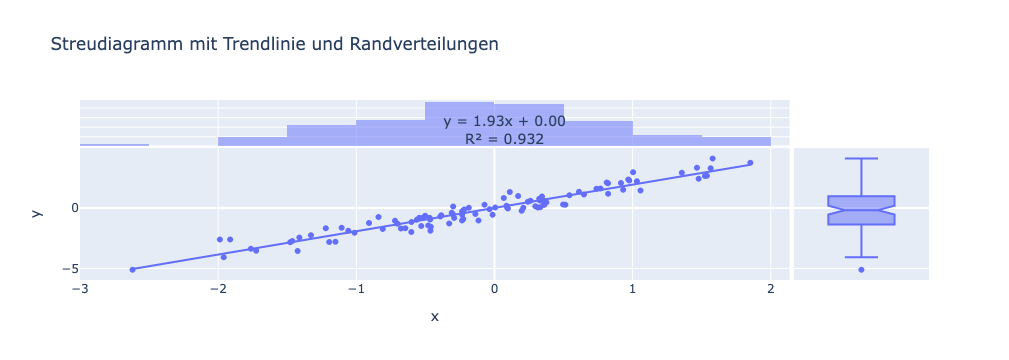

In [6]:
# Streudiagramm mit Trendlinie und Randverteilungen
np.random.seed(42)
n = 100
x = np.random.normal(0, 1, n)
y = 2*x + np.random.normal(0, 0.5, n)  # Linearer Zusammenhang mit Steigung 2
df = pd.DataFrame({'x': x, 'y': y})

# Erweitertes Streudiagramm
fig = px.scatter(
    df, 
    x='x', 
    y='y', 
    trendline='ols',      # Ordinary Least Squares Regression
    marginal_x='histogram',  # Histogramm für x-Achse
    marginal_y='box',        # Box-Plot für y-Achse
    title='Streudiagramm mit Trendlinie und Randverteilungen'
)

# Trendliniengleichung anzeigen
import statsmodels.api as sm
X = sm.add_constant(df['x'])
model = sm.OLS(df['y'], X).fit()
intercept, slope = model.params
r_squared = model.rsquared

fig.add_annotation(
    x=0.5, y=0.95,
    text=f'y = {slope:.2f}x + {intercept:.2f}<br>R² = {r_squared:.3f}',
    showarrow=False,
    xref='paper', yref='paper',
    font=dict(size=14)
)

fig.show()

**Erklärung:**
- Wir generieren Daten mit einem klaren linearen Zusammenhang
- Mit `trendline='ols'` fügen wir eine lineare Regressionslinie hinzu
- `marginal_x='histogram'` und `marginal_y='box'` fügen Randverteilungen hinzu
- Wir berechnen und zeigen die Regressionsgleichung und das Bestimmtheitsmaß (R²) an

#### 3.1 Aufgabe:

> (a) Erstelle ein Streudiagramm mit den folgenden Eigenschaften:
>- Generiere 200 zufällige Punkte mit x-Werten zwischen 0 und 10
>- y-Werte sollen durch die Funktion y = sin(x) + `np.random.normal(0,0.3, 200)` erzeugt werden
>- Färbe die Punkte basierend auf dem x-Wert ein (Farbverlauf)
>- Füge eine Trendlinie hinzu

In [ ]:
# Deine Lösung:





#### Lösung:

In [ ]:
# Daten generieren
np.random.seed(42)  # Für reproduzierbare Ergebnisse
n = 200
x = np.random.uniform(0, 10, n)
y = np.sin(x) + np.random.normal(0, 0.3, n)

# DataFrame erstellen
df = pd.DataFrame({'x': x, 'y': y})

# Streudiagramm erstellen
fig = px.scatter(
    df, 
    x='x', 
    y='y',
    color=x,  # Färbung basierend auf x-Werten
    color_continuous_scale='Viridis',  # Farbverlauf
    trendline='ols',  # Lineare Trendlinie (Ordinary Least Squares)
    title='Sinusfunktion mit Rauschen',
    labels={'x': 'x-Werte', 'y': 'sin(x) + Rauschen', 'color': 'x-Wert'}
)

fig.show()

## 4 Balkendiagramme (Bar Charts)

### Wie funktionieren Balkendiagramme in Plotly Express?

Die Hauptfunktion für Balkendiagramme ist `px.bar()`, die kategoriale Daten als vertikale Balken darstellt. Für horizontale Balken gibt es `px.bar()` mit dem Parameter `orientation='h'` oder direkt `px.barh()`.

**Wichtige Parameter:**

- `data_frame`: Der DataFrame mit den zu plottenden Daten
- `x`, `y`: Spalten für Kategorien und Werte (bei vertikalen Balken)
- `color`: (Optional) Spalte für die Farbkodierung der Balken
- `barmode`: Art der Balkenanordnung ('group', 'stack', 'overlay', 'relative')
- `text`: (Optional) Spalte für Text auf den Balken
- `orientation`: Orientierung der Balken ('v' für vertikal, 'h' für horizontal)
- `pattern_shape`: (Optional) Muster für die Balken
- `log_y`, `log_x`: (Optional) Logarithmische Achsen
- `error_y`, `error_x`: (Optional) Fehlerbalken

### Beispiel 1: Einfaches Balkendiagramm

In [ ]:
# Einfache Daten
kategorien = ['Kategorie A', 'Kategorie B', 'Kategorie C', 'Kategorie D']
werte = [25, 40, 30, 50]
df = pd.DataFrame({'Kategorie': kategorien, 'Wert': werte})

# Einfaches Balkendiagramm
fig = px.bar(
    df, 
    x='Kategorie', 
    y='Wert', 
    title='Einfaches Balkendiagramm',
    color='Kategorie',  # Farbkodierung nach Kategorie
    text='Wert'         # Werte auf den Balken anzeigen
)

# Werte über den Balken positionieren
fig.update_traces(textposition='outside')

fig.show()

**Erklärung:**
- Wir erstellen einen einfachen DataFrame mit Kategorien und Werten
- Mit `px.bar()` erzeugen wir ein Balkendiagramm
- `text='Wert'` und `textposition='outside'` zeigen die Werte über den Balken an
- `color='Kategorie'` färbt jeden Balken entsprechend seiner Kategorie ein

### Beispiel 2: Gruppierte und gestapelte Balkendiagramme

In [ ]:
# Daten für gruppierte und gestapelte Balkendiagramme
df = pd.DataFrame({
    'Kategorie': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Gruppe': ['Gruppe 1', 'Gruppe 2', 'Gruppe 3', 'Gruppe 1', 'Gruppe 2', 'Gruppe 3', 'Gruppe 1', 'Gruppe 2', 'Gruppe 3'],
    'Wert': [10, 15, 7, 12, 18, 5, 8, 11, 9]
})

# Gruppiertes Balkendiagramm
fig1 = px.bar(
    df, 
    x='Kategorie', 
    y='Wert', 
    color='Gruppe', 
    barmode='group',  # Gruppierte Balken
    title='Gruppiertes Balkendiagramm'
)

# Gestapeltes Balkendiagramm
fig2 = px.bar(
    df, 
    x='Kategorie', 
    y='Wert', 
    color='Gruppe', 
    barmode='stack',  # Gestapelte Balken
    title='Gestapeltes Balkendiagramm'
)

# Beide Diagramme anzeigen
fig1.show()
fig2.show()

**Erklärung:**
- Wir erstellen einen DataFrame mit Kategorien, Gruppen und Werten
- Mit `barmode='group'` werden die Balken gruppiert nebeneinander angezeigt
- Mit `barmode='stack'` werden die Balken gestapelt übereinander angezeigt
- `color='Gruppe'` färbt die Balken nach Gruppen ein

### Beispiel 3: Horizontales Balkendiagramm

In [ ]:
# Daten für horizontales Balkendiagramm
länder = ['Deutschland', 'Frankreich', 'Italien', 'Spanien', 'Großbritannien']
werte = [82.8, 66.9, 60.5, 46.7, 66.0]
df = pd.DataFrame({'Land': länder, 'Bevölkerung (Mio.)': werte})

# Sortieren nach Werten
df = df.sort_values('Bevölkerung (Mio.)')

# Horizontales Balkendiagramm
fig = px.bar(
    df, 
    y='Land',           # Beachten Sie: y ist jetzt die Kategorie
    x='Bevölkerung (Mio.)', 
    orientation='h',    # Horizontale Ausrichtung
    title='Bevölkerung ausgewählter europäischer Länder',
    text='Bevölkerung (Mio.)'  # Werte auf den Balken anzeigen
)

# Werte innerhalb der Balken positionieren
fig.update_traces(textposition='inside')

fig.show()

**Erklärung:**
- Wir erstellen einen DataFrame mit Ländern und Bevölkerungszahlen
- Wir sortieren die Daten für eine bessere Visualisierung
- Mit `orientation='h'` und dem Tausch von x und y erzeugen wir ein horizontales Balkendiagramm
- `textposition='inside'` positioniert die Werte innerhalb der Balken

#### 4.1 Aufgaben:

> (a) Erstelle ein Balkendiagramm mit folgenden Eigenschaften:
>- Zeige die monatlichen Durchschnittstemperaturen einer Stadt über ein Jahr hinweg
>- Erstelle dafür einen DataFrame mit den Spalten: `'Monate', 'Temperatur'`& `'Jahreszeit'`
>- Färbe die Balken entsprechend der Jahreszeit ein
>- Füge einen aussagekräftigen Titel und Achsenbeschriftungen hinzu

In [ ]:
# Deine Lösung:





In [ ]:
# Daten erstellen
monate = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
temperaturen = [2, 3, 8, 13, 18, 21, 23, 22, 18, 13, 7, 3]  # Beispieltemperaturen

# Jahreszeiten bestimmen
jahreszeiten = ['Winter', 'Winter', 'Frühling', 'Frühling', 'Frühling', 
                'Sommer', 'Sommer', 'Sommer', 'Herbst', 'Herbst', 'Herbst', 'Winter']

# Farbzuordnung für Jahreszeiten
farben = {'Winter': 'lightblue', 'Frühling': 'lightgreen', 
          'Sommer': 'gold', 'Herbst': 'orange'}

# DataFrame erstellen
df = pd.DataFrame({
    'Monat': monate,
    'Temperatur': temperaturen,
    'Jahreszeit': jahreszeiten
})

# Balkendiagramm erstellen
fig = px.bar(
    df, 
    x='Monat', 
    y='Temperatur',
    color='Jahreszeit',
    color_discrete_map=farben,  # Benutzerdefinierte Farben für Jahreszeiten
    title='Monatliche Durchschnittstemperaturen in Berlin',
    labels={'Monat': 'Monat', 'Temperatur': 'Temperatur (°C)', 'Jahreszeit': 'Jahreszeit'}
)

# Werte über den Balken anzeigen
fig.update_traces(texttemplate='%{y}°C', textposition='outside')

fig.show()

## 5 Kreis- und Ringdiagramme (Pie and Donut Charts)

### Wie funktionieren Kreis- und Ringdiagramme in Plotly Express?

Die Hauptfunktion für Kreisdiagramme ist `px.pie()`, die kategoriale Daten als Kreissegmente darstellt. Ein Ringdiagramm ist ein Kreisdiagramm mit zusätzlichen Parametern für ein Loch in der Mitte.

**Wichtige Parameter:**

- `data_frame`: Der DataFrame mit den zu plottenden Daten
- `values`: Spalte mit den numerischen Werten für die Segmentgröße
- `names`: Spalte mit den Kategorienamen
- `color`: (Optional) Spalte für die Farbkodierung (falls abweichend von `names`)
- `hole`: Größe des Lochs in der Mitte (0 bis 1, 0 = Kreisdiagramm, > 0 = Ringdiagramm)
- `color_discrete_map`: (Optional) Benutzerdefinierte Farbzuordnung
- `title`: (Optional) Titel des Diagramms
- `labels`: (Optional) Dictionary, um Beschriftungen anzupassen

### Beispiel 1: Einfaches Kreisdiagramm

In [ ]:
# Einfache Daten
kategorien = ['Komponente A', 'Komponente B', 'Komponente C', 'Komponente D']
werte = [25, 40, 20, 15]
df = pd.DataFrame({'Komponente': kategorien, 'Prozentsatz': werte})

# Einfaches Kreisdiagramm
fig = px.pie(
    df, 
    values='Prozentsatz', 
    names='Komponente', 
    title='Aufschlüsselung der Systemkomponenten'
)

fig.show()

**Erklärung:**
- Wir erstellen einen einfachen DataFrame mit Komponenten und deren Prozentsätzen
- Mit `px.pie()` erzeugen wir ein Kreisdiagramm
- `values='Prozentsatz'` bestimmt die Größe der Segmente
- `names='Komponente'` bestimmt die Beschriftungen der Segmente

### Beispiel 2: Ringdiagramm mit Anpassungen

In [ ]:
# Ringdiagramm erstellen
fig = px.pie(
    df, 
    values='Prozentsatz', 
    names='Komponente', 
    title='Ringdiagramm der Systemkomponenten',
    hole=0.4,  # Loch in der Mitte für Ringdiagramm
    color_discrete_sequence=px.colors.qualitative.Pastel  # Farbpalette
)

# Informationen in der Mitte des Rings anzeigen
fig.update_layout(
    annotations=[dict(
        text='Gesamt:<br>100%',
        x=0.5, y=0.5,
        font_size=20,
        showarrow=False
    )]
)

# Segmentbeschriftungen anpassen
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    insidetextorientation='radial'
)

fig.show()

**Erklärung:**
- Wir verwenden denselben DataFrame wie im vorherigen Beispiel
- Mit `hole=0.4` wandeln wir das Kreisdiagramm in ein Ringdiagramm um
- `color_discrete_sequence` ändert die Farbpalette
- Mit `update_layout()` fügen wir Text in der Mitte des Rings hinzu
- Mit `update_traces()` passen wir die Segmentbeschriftungen an

### Beispiel 3: Verschachteltes Kreisdiagramm (Sunburst)

In [ ]:
# Daten für ein verschachteltes Kreisdiagramm
df = pd.DataFrame({
    'Kategorie': ['Elektronik', 'Elektronik', 'Elektronik', 'Kleidung', 'Kleidung', 'Lebensmittel', 'Lebensmittel', 'Lebensmittel'],
    'Unterkategorie': ['Smartphones', 'Laptops', 'Zubehör', 'Oberbekleidung', 'Schuhe', 'Obst', 'Gemüse', 'Backwaren'],
    'Umsatz': [500, 600, 200, 350, 250, 150, 130, 90]
})

# Verschachteltes Kreisdiagramm (Sunburst)
fig = px.sunburst(
    df, 
    path=['Kategorie', 'Unterkategorie'],  # Hierarchieebenen
    values='Umsatz',
    title='Umsatzverteilung nach Kategorien und Unterkategorien'
)

fig.show()

**Erklärung:**
- Wir erstellen einen DataFrame mit hierarchischen Daten (Kategorien und Unterkategorien)
- Mit `px.sunburst()` erzeugen wir ein verschachteltes Kreisdiagramm (Sunburst)
- `path=['Kategorie', 'Unterkategorie']` definiert die Hierarchieebenen
- `values='Umsatz'` bestimmt die Größe der Segmente

#### 5.1 Aufgaben:

> (a) Erstelle ein Ringdiagramm mit folgenden Eigenschaften:
>- Zeigen Sie die Marktanteile der Hersteller `['Hersteller A', 'Hersteller B', 'Hersteller C', 'Hersteller D', 'Andere']` in einem bestimmten Marktsegment. (`DataFrame` erstellen mit den Spalten: `'Hersteller', 'Marktanteile'`)
>- Füge ein Loch in der Mitte hinzu und platziere den Titel des Diagramms darin

In [ ]:
# Deine Lösung:





#### Lösung:

In [ ]:
# Daten erstellen
hersteller = ['Hersteller A', 'Hersteller B', 'Hersteller C', 'Hersteller D', 'Andere']
marktanteile = [28, 22, 17, 13, 20]

# DataFrame erstellen
df = pd.DataFrame({
    'Hersteller': hersteller,
    'Marktanteil': marktanteile
})

# Ringdiagramm erstellen
fig = px.pie(
    df,
    values='Marktanteil',
    names='Hersteller',
    hole=0.5,  # Loch in der Mitte für Ringdiagramm
    title='Marktanteile nach Hersteller',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Titel in der Mitte des Rings anzeigen
fig.update_layout(
    annotations=[dict(
        text='Marktanteile<br>nach Hersteller',
        x=0.5, y=0.5,
        font_size=16,
        showarrow=False
    )]
)

# Segmentbeschriftungen anpassen
fig.update_traces(
    textinfo='percent+label',
    textposition='outside'
)

fig.show()

## 6 Bonus: Exportieren und Teilen von interaktiven HTML


In [ ]:
# Daten generieren
np.random.seed(42)
n = 200
x = np.random.normal(0, 1, n)
y = x + np.random.normal(0, 0.5, n)
colors = np.random.choice(['red', 'blue', 'green'], n)
sizes = np.random.uniform(5, 15, n)

# Figur und Subplots erstellen
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=('Scatter Plot', 'Histogram'),
                   column_widths=[0.7, 0.3])

# Scatter Plot
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', 
               marker=dict(color=colors, size=sizes),
               name='Data Points'),
    row=1, col=1
)

# Histogram
fig.add_trace(
    go.Histogram(x=y, name='Distribution'),
    row=1, col=2
)

# Update Layout
fig.update_layout(title_text="Interactive Dashboard Example", 
                  height=500, width=900)

# Exportieren als interaktive HTML
fig.write_html("interactive_dashboard.html")

print("Interactives Dashboard als HTML exportiert!")


# Fazit: Einführung in Plotly und grundlegende Diagrammtype


In diesem Notebook haben wir die Grundlagen der Datenvisualisierung mit Plotly Express kennengelernt. Die Bibliothek bietet eine moderne, interaktive Alternative zu Matplotlib mit einer benutzerfreundlichen API. Wir haben die Architektur von Plotly erkundet, die auf Figure-, Trace- und Layout-Objekten basiert, und gesehen, wie diese durch JSON-ähnliche Strukturen repräsentiert werden.

Die vier grundlegenden Diagrammtypen – Liniendiagramme, Streudiagramme, Balkendiagramme sowie Kreis- und Ringdiagramme – wurden ausführlich mit ihren Anwendungsfällen und Parametern behandelt. Jeder Diagrammtyp bietet spezifische Anpassungsoptionen, die wir durch praktische Beispiele erkundet haben.

Ein wesentlicher Vorteil von Plotly gegenüber Matplotlib ist die native Interaktivität. Wir haben gesehen, wie die Visualisierungen automatisch Funktionen wie Zoomen, Schwenken und Hover-Informationen bereitstellen. Diese Eigenschaften machen Plotly besonders wertvoll für explorative Datenanalyse und interaktive Dashboards. Die Syntax von Plotly Express ermöglicht es uns, mit wenigen Codezeilen komplexe, ansprechende Visualisierungen zu erstellen, die in Webbrowsern nativ funktionieren und über HTML geteilt werden können.

